In [312]:
import pandas as pd

df = pd.read_csv("finalru_dataset_twocam_annotation_ratio.csv")

In [315]:
df

,number,vs,lang,sentence,modif-sentence,Relevance,Quality
0,1,ноутбук VS стационарный компьютер_objA,en,"Оказывается, мой ноутбук работает быстрее и лу...","Оказывается, мой ноутбук работает быстрее и лу...",2,1
1,2,ноутбук VS стационарный компьютер_objA,en,Мой 5-летний Intel LAPTOP работает лучше и быс...,Мой 5-летний Intel LAPTOP работает лучше и быс...,2,2
2,3,ноутбук VS стационарный компьютер_objA,en,"Я поместил SuSE на ноутбук, потому что он уста...","Я поместил SuSE на ноутбук, потому что он уста...",2,1
3,4,ноутбук VS стационарный компьютер_objA,en,"Хотя и не самая высокая спецификация, Verona л...","Хотя и не самая высокая спецификация, Verona л...",1,1
4,5,ноутбук VS стационарный компьютер_objA,en,Ноутбук нуждается в большей пропускной способн...,Ноутбук нуждается в большей пропускной способн...,0,1
...,...,...,...,...,...,...,...
1278,1279,Python VS R_objA,ru,"При этом зарплата специалистов, использующих P...","При этом зарплата специалистов, использующих P...",2,2
1279,1280,Python VS R_objA,ru,"Можно ожидать, что в ближайшие годы доля Pytho...","Можно ожидать, что в ближайшие годы доля Pytho...",2,2
1280,1281,Python VS R_objB,ru,"Зарплата у тех, кто пишет на узком языке R, вы...","Зарплата у тех, кто пишет на узком языке R, вы...",2,2
1281,1282,Python VS R_objB,ru,"Однако, когда количество итераций превысило 10...","Однако, когда количество итераций превысило 10...",2,2


In [361]:
lang = 'en'
#lang = 'ru'
letter = "A"
#letter = "B"
parameter = 'Relevance'
parameter = 'Quality'

df_en = df[(df['lang'] == lang) & (df['vs'].str.endswith(letter))]

In [362]:
n2text = dict(enumerate(set(df_en['vs'].values.tolist())))
text2n = dict([reversed(i) for i in n2text.items()])

In [363]:
df_en['qid'] = df_en['vs'].apply(lambda x: text2n[x])
df_en['0'] = 0
df_en['Q0'] = 0
df_en['doc'] = df_en['sentence'].apply(hash)
df_en['rel'] = df_en[parameter]
df_en['rank'] = df_en.groupby('vs').cumcount()+1
df_en['score'] = 100-df_en.groupby('vs').cumcount()
df_en['tag'] = df_en['lang']

/tmp/ipykernel_1668210/924061491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['qid'] = df_en['vs'].apply(lambda x: text2n[x])
/tmp/ipykernel_1668210/924061491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['0'] = 0
/tmp/ipykernel_1668210/924061491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [364]:
df_en[["qid", "0", "doc", "rel"]].to_csv(f"touche-{parameter}-{lang}-{letter}.qrels", sep=' ', header=None, index=None)
df_en[["qid", "Q0", "doc", "rank", 'score', 'tag']].to_csv(f"touche-{parameter}-run-{lang}-{letter}.txt", sep=' ', header=None, index=None)

In [258]:
df_en[["qid", "Q0", "doc", "rank", 'score', 'tag']]

# doc-hash

df_en[["qid", 'vs', "Q0", "doc", "rank", 'score', 'tag']].tail(20)

,qid,vs,Q0,doc,rank,score,tag
1225,87,гибридный VS дизельное топливо_objA,0,572650862758076667,10,91,ru
1226,14,гибридный VS дизельное топливо_objB,0,3910620062558081730,1,100,ru
1227,14,гибридный VS дизельное топливо_objB,0,2296062544409383648,2,99,ru
1228,14,гибридный VS дизельное топливо_objB,0,-6909600449516314579,3,98,ru
1229,14,гибридный VS дизельное топливо_objB,0,2232730850845577145,4,97,ru
1230,14,гибридный VS дизельное топливо_objB,0,-7130069899359135068,5,96,ru
1231,14,гибридный VS дизельное топливо_objB,0,3051937065327474865,6,95,ru
1252,29,Python VS R_objA,0,-7510270963906685968,1,100,ru
1253,29,Python VS R_objA,0,2584216854638084806,2,99,ru
1254,29,Python VS R_objA,0,-8295564416573445715,3,98,ru


In [259]:
df_en[["qid", "0", "doc", "rel"]]

,qid,0,doc,rel
20,31,0,6349598863092619531,1
21,31,0,-4280253378211461870,1
22,31,0,-4284752342778999657,2
23,31,0,-1103072187069079332,2
24,31,0,-6315935804611827058,1
...,...,...,...,...
1260,29,0,-4629706299797585800,2
1261,29,0,-2440348244136416320,2
1262,5,0,-2768365648722230430,2
1263,5,0,-3928701697425830096,2


In [218]:
import seaborn as sns

<Axes: xlabel='lang', ylabel='Quality'>

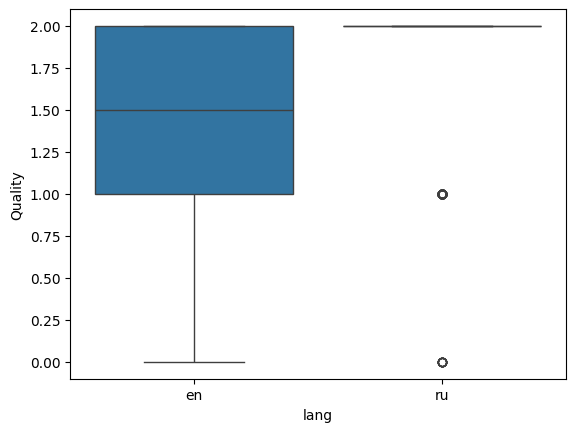

In [231]:
sns.boxplot(data=df[['Quality', 'lang']].dropna(), x="lang", y="Quality")

<Axes: xlabel='lang', ylabel='Relevance'>

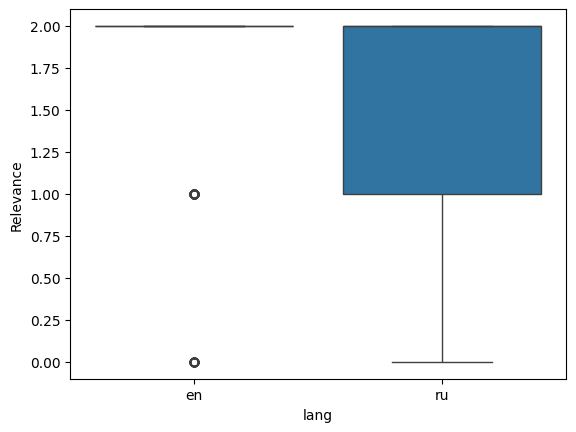

In [232]:
sns.boxplot(data=df[['Relevance', 'lang']].dropna(), x="lang", y="Relevance")

In [211]:
df.groupby('lang')['Relevance'].mean(), df.groupby('lang')['Relevance'].std()

(lang
 en    1.707358
 ru    1.435052
 Name: Relevance, dtype: float64,
 lang
 en    0.595612
 ru    0.764940
 Name: Relevance, dtype: float64)

In [212]:
df.groupby('lang')['Quality'].mean(), df.groupby('lang')['Quality'].std()

(lang
 en    1.413043
 ru    1.789691
 Name: Quality, dtype: float64,
 lang
 en    0.645793
 ru    0.451234
 Name: Quality, dtype: float64)

In [150]:
# !wget https://raw.githubusercontent.com/touche-webis-de/touche-code/main/clef21/evaluate.py

In [276]:
!python3 evaluate_.py --qrel_path=touche-Relevance-en.qrels --run_path=touche-Relevance-run-en.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-en.qrels --run_path=touche-Relevance-run-en.txt --depth=10

  Tag  nDCG@5
0  en   0.879
  Tag  nDCG@10
0  en    0.948


In [366]:
!python3 evaluate_.py --qrel_path=touche-Relevance-en-A.qrels --run_path=touche-Relevance-run-en-A.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-en-A.qrels --run_path=touche-Relevance-run-en-A.txt --depth=10
!python3 evaluate_.py --qrel_path=touche-Relevance-en-B.qrels --run_path=touche-Relevance-run-en-B.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-en-B.qrels --run_path=touche-Relevance-run-en-B.txt --depth=10

  Tag  nDCG@5
0  en    0.91
  Tag  nDCG@10
0  en    0.965
  Tag  nDCG@5
0  en   0.853
  Tag  nDCG@10
0  en    0.939


In [277]:
!python3 evaluate_.py --qrel_path=touche-Relevance-ru.qrels --run_path=touche-Relevance-run-ru.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-ru.qrels --run_path=touche-Relevance-run-ru.txt --depth=10

  Tag  nDCG@5
0  ru   0.837
  Tag  nDCG@10
0  ru    0.903


In [367]:
!python3 evaluate_.py --qrel_path=touche-Quality-en-A.qrels --run_path=touche-Quality-run-en-A.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-en-A.qrels --run_path=touche-Quality-run-en-A.txt --depth=10
!python3 evaluate_.py --qrel_path=touche-Quality-en-B.qrels --run_path=touche-Quality-run-en-B.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-en-B.qrels --run_path=touche-Quality-run-en-B.txt --depth=10

/ltstorage/home/nikishina/evaluate.py:54: RuntimeWarning: invalid value encountered in double_scalars
  return np.float64(v - min_v) / np.float64(max_v - min_v)
  Tag  nDCG@5
0  en   0.808
/ltstorage/home/nikishina/evaluate.py:54: RuntimeWarning: invalid value encountered in double_scalars
  return np.float64(v - min_v) / np.float64(max_v - min_v)
  Tag  nDCG@10
0  en    0.914
  Tag  nDCG@5
0  en   0.791
  Tag  nDCG@10
0  en    0.898


In [278]:
!python3 evaluate_.py --qrel_path=touche-Quality-en.qrels --run_path=touche-Quality-run-en.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-en.qrels --run_path=touche-Quality-run-en.txt --depth=10

/ltstorage/home/nikishina/evaluate.py:54: RuntimeWarning: invalid value encountered in double_scalars
  return np.float64(v - min_v) / np.float64(max_v - min_v)
  Tag  nDCG@5
0  en   0.799
/ltstorage/home/nikishina/evaluate.py:54: RuntimeWarning: invalid value encountered in double_scalars
  return np.float64(v - min_v) / np.float64(max_v - min_v)
  Tag  nDCG@10
0  en    0.905


In [368]:
!python3 evaluate_.py --qrel_path=touche-Relevance-ru-A.qrels --run_path=touche-Relevance-run-ru-A.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-ru-A.qrels --run_path=touche-Relevance-run-ru-A.txt --depth=10
!python3 evaluate_.py --qrel_path=touche-Relevance-ru-B.qrels --run_path=touche-Relevance-run-ru-B.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Relevance-ru-B.qrels --run_path=touche-Relevance-run-ru-B.txt --depth=10

  Tag  nDCG@5
0  ru   0.842
  Tag  nDCG@10
0  ru    0.902
  Tag  nDCG@5
0  ru   0.833
  Tag  nDCG@10
0  ru    0.904


In [279]:
!python3 evaluate_.py --qrel_path=touche-Quality-ru.qrels --run_path=touche-Quality-run-ru.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-ru.qrels --run_path=touche-Quality-run-ru.txt --depth=10

  Tag  nDCG@5
0  ru   0.932
  Tag  nDCG@10
0  ru    0.963


In [369]:
!python3 evaluate_.py --qrel_path=touche-Quality-ru-A.qrels --run_path=touche-Quality-run-ru-A.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-ru-A.qrels --run_path=touche-Quality-run-ru-A.txt --depth=10
!python3 evaluate_.py --qrel_path=touche-Quality-ru-B.qrels --run_path=touche-Quality-run-ru-B.txt --depth=5
!python3 evaluate_.py --qrel_path=touche-Quality-ru-B.qrels --run_path=touche-Quality-run-ru-B.txt --depth=10

  Tag  nDCG@5
0  ru   0.933
  Tag  nDCG@10
0  ru    0.962
  Tag  nDCG@5
0  ru   0.931
  Tag  nDCG@10
0  ru    0.964
